# TP 2 : Analyse en composantes principales avec R

## Un esprit sain dans un corps sain

Ce sujet vous donne les moyens de conserver un esprit sain dans un corps sain. Dans un premier temps, il s'agira de prendre les mesures de ce corps à maintenir en forme (données `body.csv`). Pour cela, il est bien connu qu'une activité physique régulière est bénéfique à de nombreux de points de vue (données `athle.csv`) à condition de l'accompagner par une alimentation saine et équilibrée et ce, dès le petit déjeuner (données `cereal.txt`). Pour compléter le tout, un peu de réflexion mathématique mettra le cerveau au niveau de votre corps aguerri et bien alimenté !

## 1. Données `body`

Les données `body` sont composées d'un relevé de 5 variables morphologiques (tour d'épaule, tour de poitrine, tour de taille, masse et taille) chez 20 individus. La première étape consiste à importer ce jeu de données dans R avec la fonction `read.table()` (nous pourrions aussi utiliser `read.csv()` ou `read.csv2()`).

In [4]:
data_body <- read.table("data/body.csv", # Nom du fichier à importer
                        header=TRUE,     # Utiliser la première ligne du fichier pour les noms des colonnes
                        sep=";",         # Séparateur de champs
                        dec=",",         # Séparateur décimal
                        row.names=1)     # Utiliser la première colonne pour les noms des lignes

Pour calculer une ACP sur les données, nous pouvons utiliser la fonction `prcomp()`. Nous stockons le résultat retourné dans un objet appelé `acp_body` de notre espace de travail.

In [6]:
acp_body <- prcomp(data_body)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_body), "\n")
cat("Type de l'objet :", mode(acp_body), "\n")
cat("Test du type 'list' :", is.list(acp_body), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


Les composantes de l'objet `acp_body` sont visibles grâce à la fonction `names()`.

In [8]:
names(acp_body)

[1] "sdev"     "rotation" "center"   "scale"    "x"

Pour accéder à un de ces éléments, il faut utiliser l'opérateur `$`.

In [10]:
acp_body$sdev

[1] 15.989241  7.757795  4.846040  2.933938  2.002735

Une description détaillée des éléments contenue dans un objet de la classe `prcomp` est fournie dans l'aide de la fonction `prcomp()`.

In [12]:
help(prcomp)

prcomp {stats},R Documentation
formula,"a formula with no response variable, referring only to numeric variables."
data,an optional data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector used to select rows (observations) of the data matrix x.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit."
...,arguments passed to or from other methods. If x is a formula one might specify scale. or tol.
x,a numeric or complex matrix (or data frame) which provides the data for the principal components analysis.
retx,a logical value indicating whether the rotated variables should be returned.
center,"a logical value indicating whether the variables should be shifted to be zero centered. Alternately, a vector of length equal the number of columns of x can be supplied. The value is passed to scale."
scale.,"a logical value indicating whether the variables should be scaled to have unit variance before the analysis takes place. The default is FALSE for consistency with S, but in general scaling is advisable. Alternatively, a vector of length equal the number of columns of x can be supplied. The value is passed to scale."
tol,"a value indicating the magnitude below which components should be omitted. (Components are omitted if their standard deviations are less than or equal to tol times the standard deviation of the first component.) With the default null setting, no components are omitted (unless rank. is specified less than min(dim(x)).). Other settings for tol could be tol = 0 or tol = sqrt(.Machine$double.eps), which would omit essentially constant components."


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Que renvoie la fonction <code>summary()</code> appliquée à l'objet <code>acp_body</code> ?</li>
        <li>Utilisez la fonction <code>plot()</code> avec l'objet <code>acp_body</code> pour représenter l'éboulis des valeurs propres. Combien de dimensions semble-t-il raisonnable de retenir pour les représentations graphiques ?</li>
        <li>À l'aide de la fonction <code>biplot</code>, représenter simultanément les individus et les variables sur le premier plan principal (PC1-PC2). Commenter.</li>
        <li>Représenter seulement les individus dans le premier plan principal (voir l'attribut <code>x</code> de l'objet <code>acp_body</code>) avec un codage en 2 couleurs dépendant d'un facteur <code>sexe</code> (les 10 premiers individus étant des hommes, les 10 suivants des femmes) :<br>
            <center><img src="img/body_plan_principal.png"></center></li>
    </ol>
</div>

In [13]:
# À FAIRE
summary(acp_body)

Importance of components:
                           PC1    PC2     PC3     PC4    PC5
Standard deviation     15.9892 7.7578 4.84604 2.93394 2.0027
Proportion of Variance  0.7264 0.1710 0.06673 0.02446 0.0114
Cumulative Proportion   0.7264 0.8974 0.96414 0.98860 1.0000

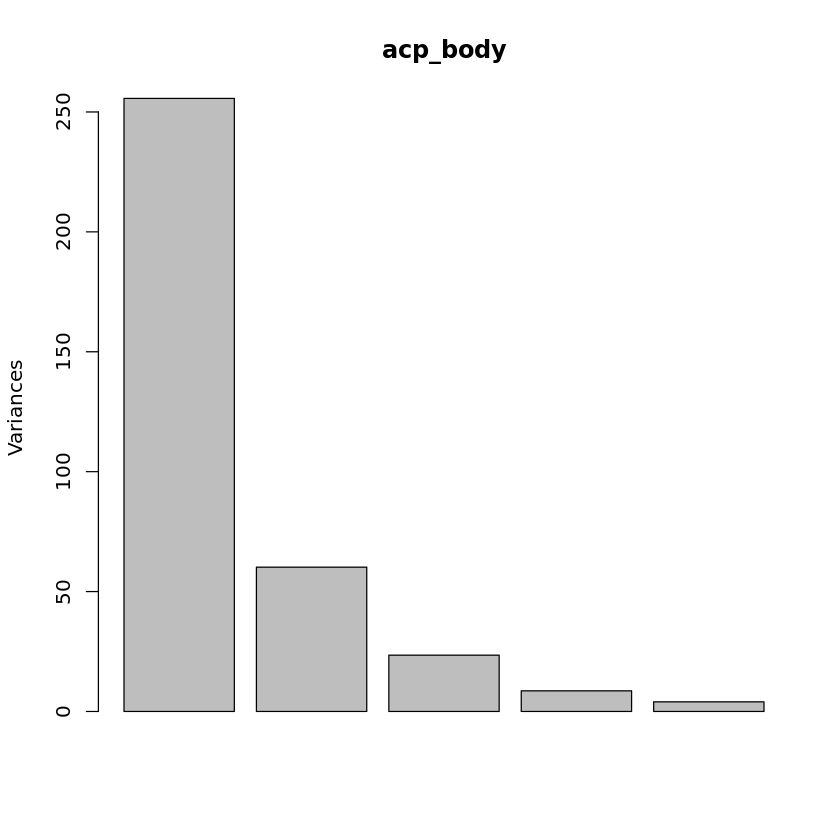

In [15]:
plot(acp_body) # 1 ou 2

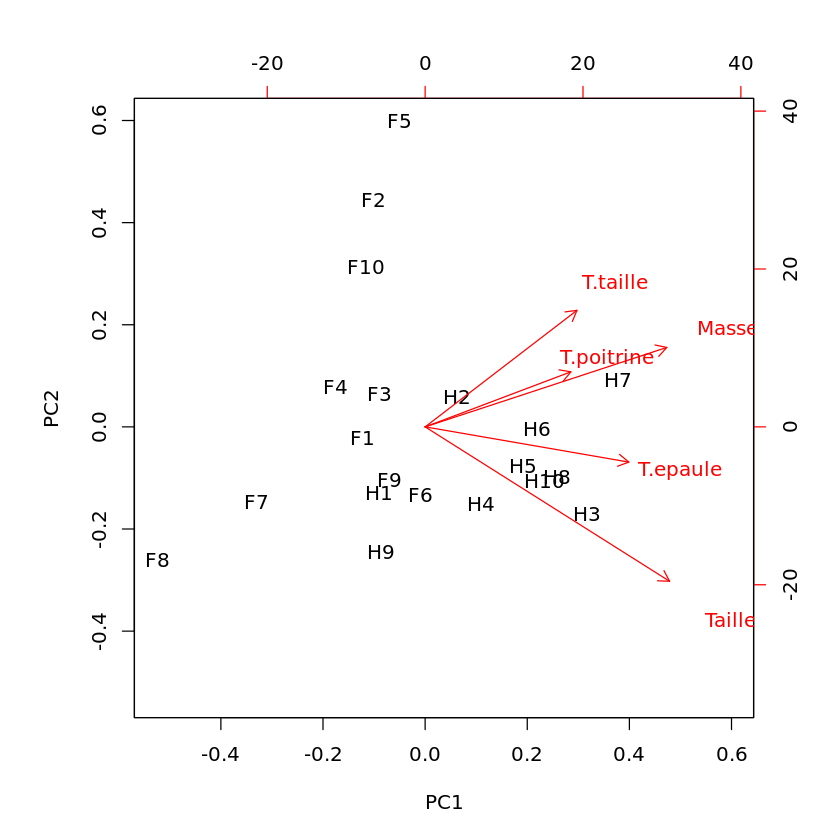

In [18]:
biplot(acp_body)
# PC1 = gabarit (grands à droite ; petits à gauche)
# PC2 = corpulence (importante en haut ; faible en bas)

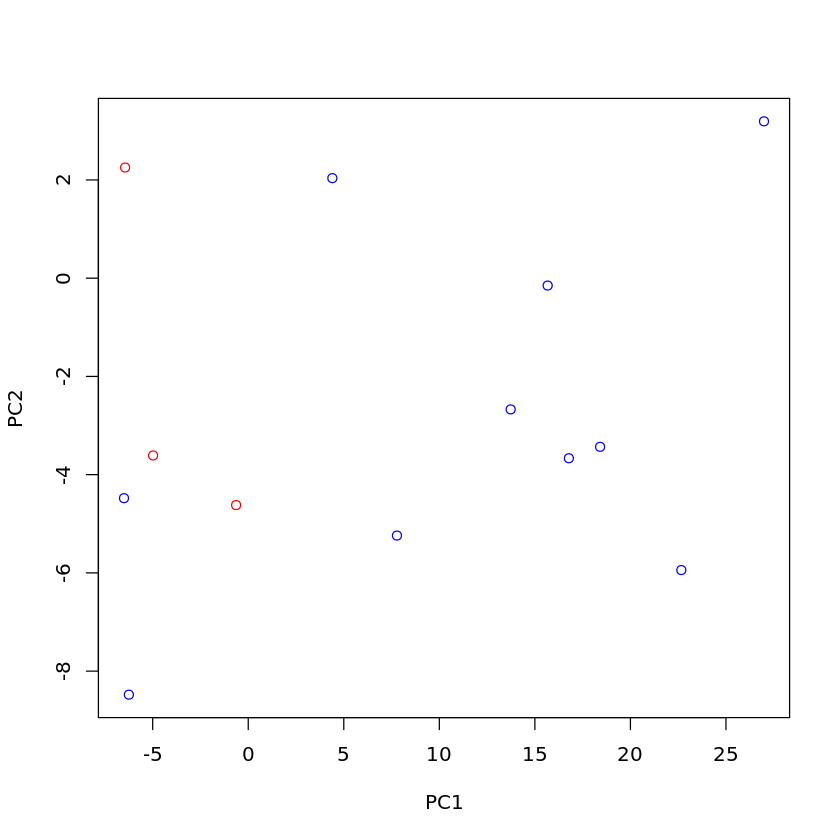

In [43]:
plot(acp_body$x[1:10,],col="blue")
points(acp_body$x[11:20,],col="red")

In [39]:
help(plot)

plot {graphics},R Documentation
x,"the coordinates of points in the plot. Alternatively, a single plotting structure, function or any R object with a plot method can be provided."
y,"the y coordinates of points in the plot, optional if x is an appropriate structure."
...,"Arguments to be passed to methods, such as graphical parameters (see par). Many methods will accept the following arguments: typewhat type of plot should be drawn. Possible types are ""p"" for points, ""l"" for lines, ""b"" for both, ""c"" for the lines part alone of ""b"", ""o"" for both ‘overplotted’, ""h"" for ‘histogram’ like (or ‘high-density’) vertical lines, ""s"" for stair steps, ""S"" for other steps, see ‘Details’ below, ""n"" for no plotting. All other types give a warning or an error; using, e.g., type = ""punkte"" being equivalent to type = ""p"" for S compatibility. Note that some methods, e.g. plot.factor, do not accept this. mainan overall title for the plot: see title. suba sub title for the plot: see title. xlaba title for the x axis: see title. ylaba title for the y axis: see title. aspthe y/x aspect ratio, see plot.window."


## 2. Données `athle`

Les données `athle` sont constituées d'un relevé des records nationaux d'athlétisme en 2010 de 26 pays pour 9 épreuves de course, du 100m au marathon.

In [44]:
# Importation des données
data_athle <- read.table("data/athle.csv", header=TRUE, dec=",", row.names=1)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP sur ces données <code>data_athle</code>.</li>
        <li>Représenter l'éboulis des valeurs propres et le diagramme biplot. Commenter.</li>
        <li>Quel(s) pré-traitement(s) vous semble(nt) nécessaire(s) (transformation de données, suppression d'observations atypiques, ...) ? Effectuer quelques manipulations pour produire des résultats d'ACP plus parlants.</li>
    </ol>
</div>

In [45]:
# À FAIRE
acp_athle <- prcomp(data_athle)
summary(acp_athle)

Importance of components:
                            PC1      PC2      PC3     PC4     PC5     PC6
Standard deviation     325.8727 41.31132 20.18163 6.16698 2.52491 1.08938
Proportion of Variance   0.9801  0.01575  0.00376 0.00035 0.00006 0.00001
Cumulative Proportion    0.9801  0.99582  0.99958 0.99993 0.99999 1.00000
                          PC7    PC8     PC9
Standard deviation     0.4803 0.3018 0.06241
Proportion of Variance 0.0000 0.0000 0.00000
Cumulative Proportion  1.0000 1.0000 1.00000

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”

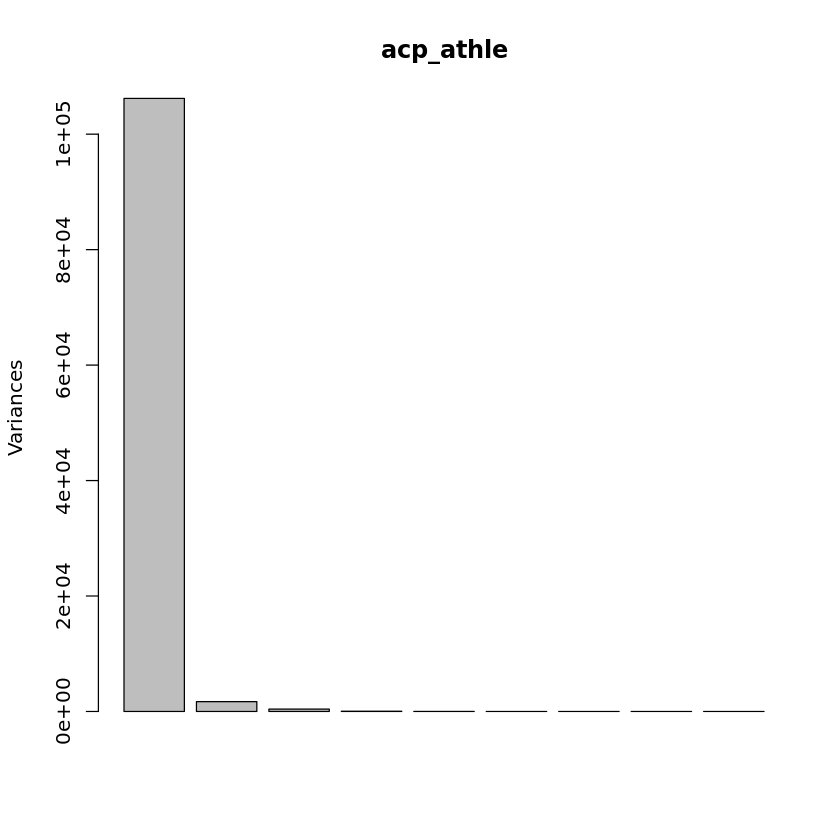

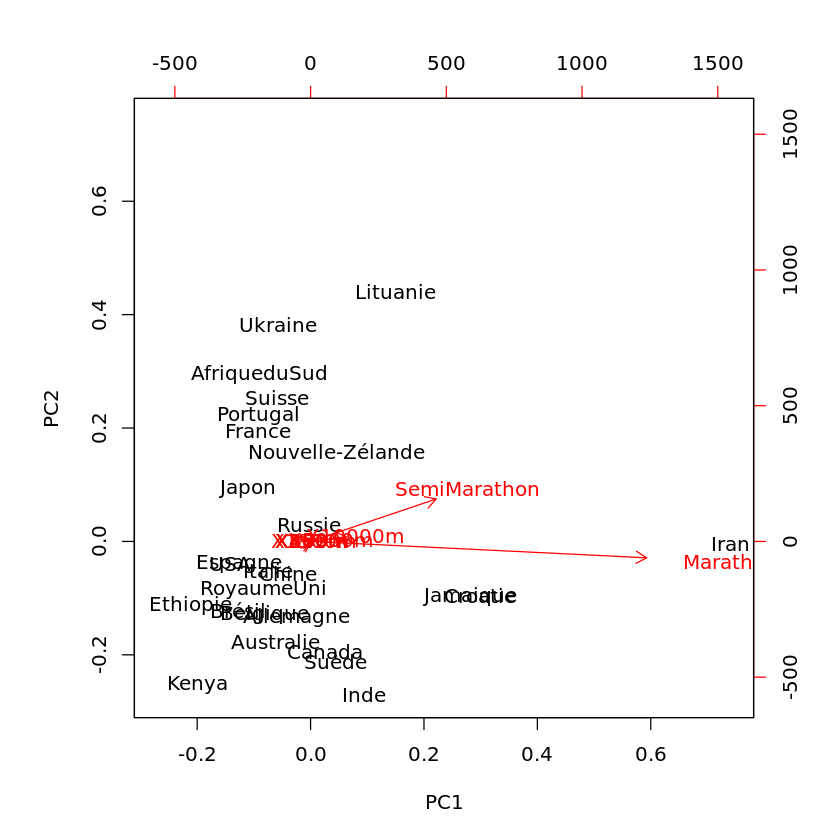

In [48]:
plot(acp_athle)
biplot(acp_athle)
# il faudrait normaliser les données pour comparer ces épreuves : il y a une plus grande variabilité dans le marathon compte tenu de la durée de l'épreuve.

In [51]:
data_athle_norm <- scale(data_athle)
acp_athle_norm <- prcomp(data_athle_norm) # ou prcomp(data_athle,scale=TRUE)
summary(acp_athle_norm)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.1909 1.4954 0.9744 0.6668 0.47542 0.43444 0.27107
Proportion of Variance 0.5334 0.2485 0.1055 0.0494 0.02511 0.02097 0.00816
Cumulative Proportion  0.5334 0.7818 0.8873 0.9367 0.96184 0.98281 0.99097
                           PC8     PC9
Standard deviation     0.21995 0.18124
Proportion of Variance 0.00538 0.00365
Cumulative Proportion  0.99635 1.00000

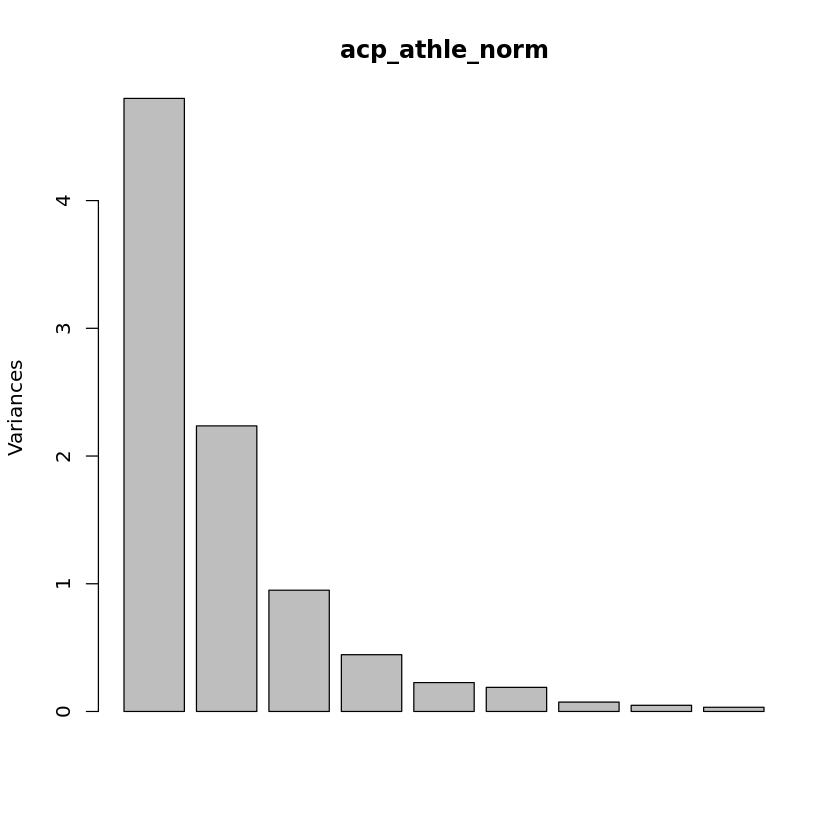

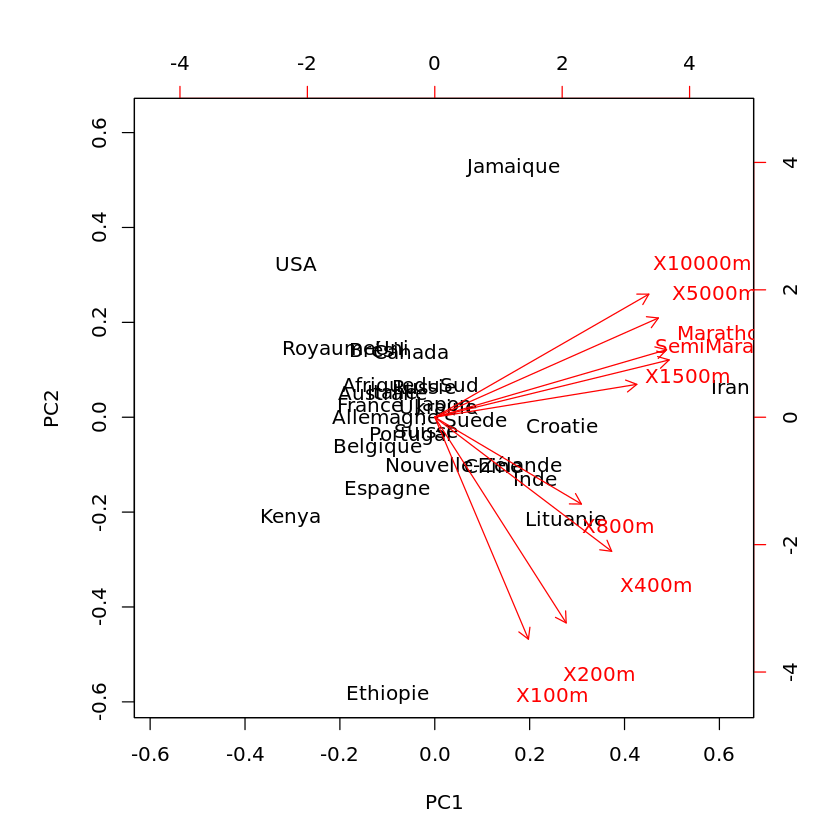

In [52]:
plot(acp_athle_norm)
biplot(acp_athle_norm)

## 3. Données `cereal`

Les données `cereal` contiennent la composition (relevée en 1993 aux États-Unis) selon 9 variables quantitatives de 77 types de paquets de céréales consommés au petit-déjeuner. Le fabriquant (variable `mfr`) est également disponible dans le jeu de données.

  * `mfr` Manufacturer of cereal (A: American Home Food Products, G: General Mills, K: Kelloggs, N: Nabisco, P: Post, Q: Quaker Oats, R: Ralston Purina).
  * `calories` Calories per serving.
  * `protein` Grams of protein.
  * `fat` Grams of fat.
  * `sodium` Milligrams of sodium.
  * `fiber` Grams of dietary fiber.
  * `carbo` Grams of complex carbohydrates.
  * `sugars` Grams of sugars.
  * `potass` Milligrams of potassium.
  * `vitamins` Vitamins and minerals (0, 25 or 100, indicating the typical percentage of FDA recommended).

L'analyse de ce jeu de données a fait l'objet d'un concours proposé par l'*American Statistical Association* (sections *Statistical Computing* et *Statistical Graphics*) en 1993 sous le titre "*Serial Correlation or Cereal Correlation ?* " :

*Every two years the Section on Statistical Graphics sponsors a special exposition where one or more data sets are made available, analyzed by anyone interested and presented in a special poster session at the Annual Meeting.*

In [54]:
# Importation des données
data_cereal <- read.table("data/cereal.txt", header=TRUE, row.names=1)

In [55]:
data_cereal

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
100%_Bran,N,70,4,1,130,10.0,5.0,6,280,25
100%_Natural_Bran,Q,120,3,5,15,2.0,8.0,8,135,0
All-Bran,K,70,4,1,260,9.0,7.0,5,320,25
All-Bran_with_Extra_Fiber,K,50,4,0,140,14.0,8.0,0,330,25
Almond_Delight,R,110,2,2,200,1.0,14.0,8,90,25
Apple_Cinnamon_Cheerios,G,110,2,2,180,1.5,10.5,10,70,25
Apple_Jacks,K,110,2,0,125,1.0,11.0,14,30,25
Basic_4,G,130,3,2,210,2.0,18.0,8,100,25
Bran_Chex,R,90,2,1,200,4.0,15.0,6,125,25
Bran_Flakes,P,90,3,0,210,5.0,13.0,5,190,25


Plusieurs packages proposent des fonctions pour calculer une ACP en offrant d'autres options que celles proposées par la fonction `prcomp()`. Un package très populaire dédié à l'analyse exploratoire de données multivariées est [`FactoMineR`](http://factominer.free.fr/) qui est maintenu par une équipe française (d'où les noms français de certains éléments). Nous vous proposons d'utiliser ce package pour le jeu de données `cereal`.

In [57]:
# Chargement du package FactoMineR
library(FactoMineR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Le calcul de l'ACP se fait avec la fonction `PCA()` et nous pouvons utiliser l'argument `quali.sup=` pour omettre les variables qualitatives (`FactoMineR` parle de *variable supplémentaire*).

In [59]:
# Calcul de l'ACP
acp_cereal <- PCA(data_cereal, quali.sup=1)

La fonction `plot()` affiche le résultat dans le plan principal pour représenter les individus (`choix="ind"`) ou les variables (`choix="var"`).

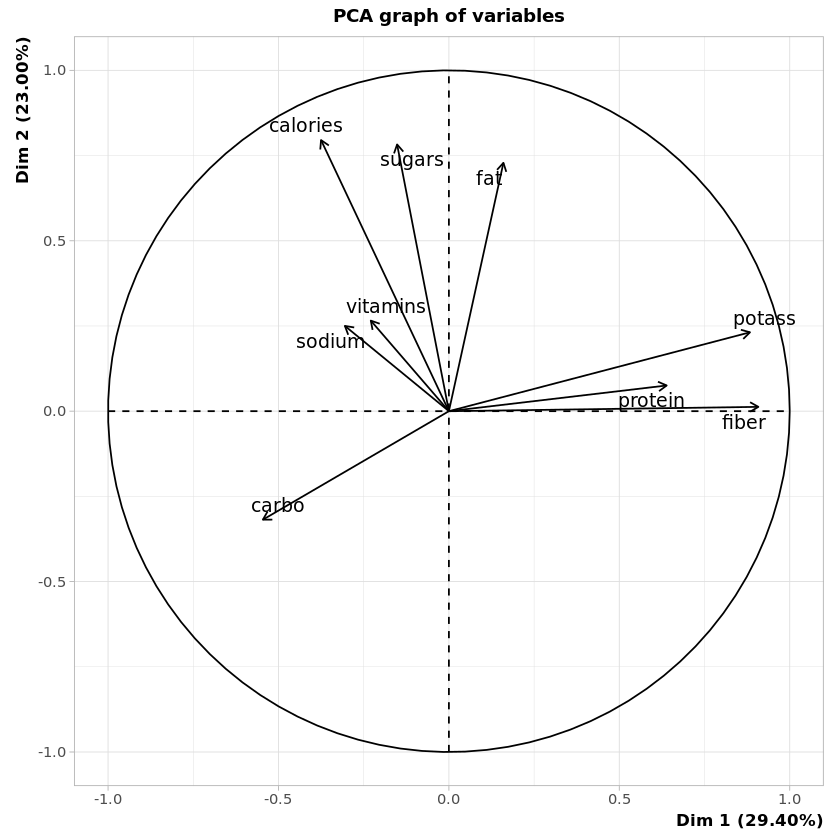

In [61]:
# Représentation des variables dans le plan principal
plot(acp_cereal, choix="var")

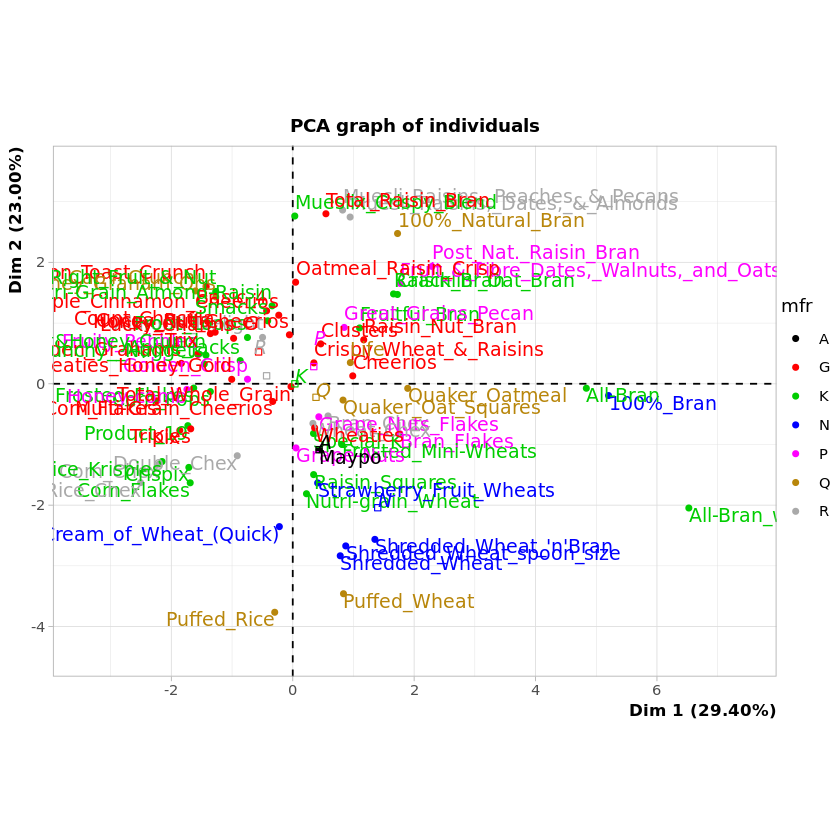

In [62]:
# Représentation des individus dans le plan principal en codant en couleur le fabriquant (colonne 1)
plot(acp_cereal, choix="ind", habillage=1)

<div class="alert alert-block alert-success">
    Pour suivre la recommandation <i>"Ne mange pas trop gras, trop salé, trop sucré"</i>, quelle(s) céréale(s) vaut-il mieux consommer ? Dans quelle zones du graphique de l'ACP se trouvent les céréales à éviter ?
</div>

In [64]:
# Il vaut mieux éviter les céréales en haut de l'axe des abscisses et privilégier les céréales à droite de l'axe des ordonnées.

## 4. Aspects mathématiques

Nous allons travailler avec une matrice à 5 lignes et 3 colonnes dont les éléments sont issus d'un tirage aléatoire sans remise d'entiers entre 1 et 15.

In [66]:
X <- matrix(sample(1:15, size=15), ncol=3)

Nous commençons par calculer l'ACP et représenter le diagramme biplot.

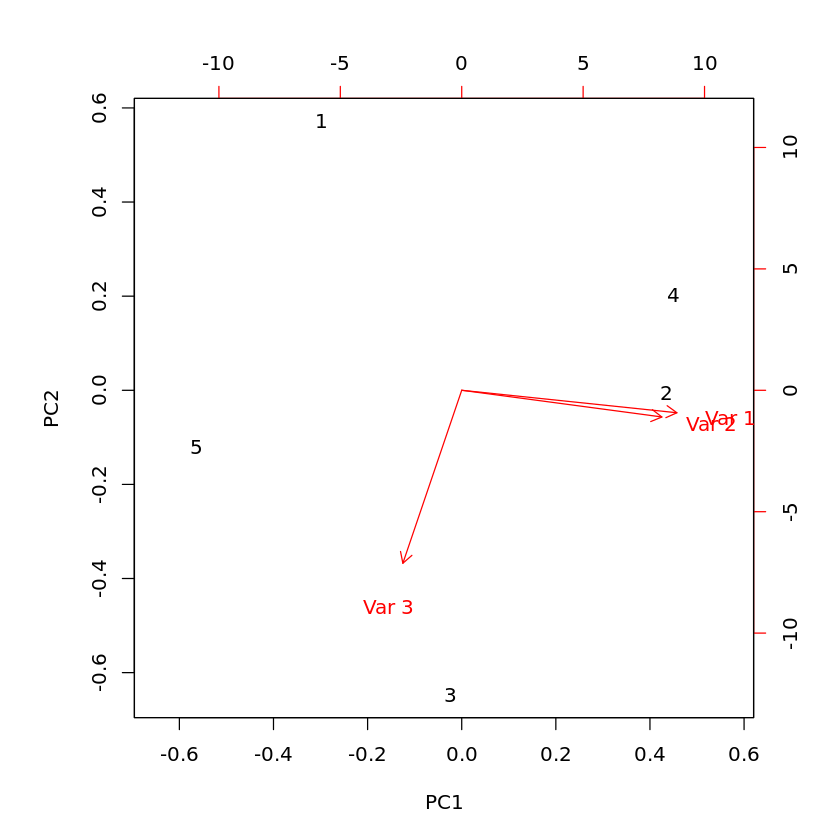

In [68]:
acp <- prcomp(X)
biplot(acp)

L'objectif des manipulations suivantes consiste à retrouver les valeurs issues de l'ACP présentes dans les composants de l'objet `acp` ou dans le résumé de l'objet obtenu avec la fonction `summary()`.

In [70]:
acp

Standard deviations (1, .., p=3):
[1] 6.899428 4.062959 1.786130

Rotation (n x k) = (3 x 3):
            PC1        PC2         PC3
[1,]  0.7179708 -0.1274232 -0.68431074
[2,]  0.6677826 -0.1513367  0.72880967
[3,] -0.1964286 -0.9802349 -0.02356432

In [71]:
summary(acp)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     6.8994 4.0630 1.7861
Proportion of Variance 0.7073 0.2453 0.0474
Cumulative Proportion  0.7073 0.9526 1.0000

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Une ACP étant une diagonalisation de la matrice de covariance, vérifier que les informations renvoyées par <code>prcomp()</code> sont similaires à celles calculées par la fonction <code>eigen()</code>. Commenter les différences si il y en a.</li>
        <li>Où retrouve-t-on les vecteurs propres renvoyés par <code>eigen()</code> dans l'objet <code>acp</code> ? Le signe de ces vecteurs est-il important ?</li>
        <li>Retrouver les résultats de l'ACP en procédant cette fois à la décomposition en valeurs singulières (fonction <code>svd()</code>) stockée dans un objet <code>s</code>.</li>
        <li>Vérifier que les vecteurs singuliers à droite (<code>s&dollar;v</code>) sont bien similaires au composant <code>rotation</code> du résultat de <code>prcomp()</code> et également aux vecteurs propres de la matrice de covariance (éventuellement au signe près).</li>
        <li>Concernant les valeurs singulières, vérifier que l'on retrouve les écarts-types renvoyés par <code>prcomp()</code> et les racines carrées des valeurs propres de la matrice de covariance.</li>
        <li>Retrouver les coordonnées des individus sur les composantes principales données par <code>acp&dollar;x</code>. Pour cela, nous pouvons par exemple faire le produit matriciel des données initiales et des vecteurs propres de la matrice de covariance.</li>
        <li>Procéder à des calculs analogues pour vérifier les calculs d'une ACP réduite (diagonalisation de la matrice des corrélations).</li>
    </ol>
</div>

In [75]:
# À FAIRE
eigen(cov(X)) # en prenant la racine carrée des valeurs propores, on retrouve bien les écarts-types renvoyés par l'ACP

eigen() decomposition
$values
[1] 47.602102 16.507640  3.190259

$vectors
           [,1]      [,2]        [,3]
[1,]  0.7179708 0.1274232  0.68431074
[2,]  0.6677826 0.1513367 -0.72880967
[3,] -0.1964286 0.9802349  0.02356432


In [76]:
# OK juste une différence globale de signe qui ne change pas les directions principales

In [78]:
s <- svd(cov(X))
s

-0.7179708,0.1274232,-0.68431074
-0.6677826,0.1513367,0.72880967
0.1964286,0.9802349,-0.02356432
-0.7179708,0.1274232,-0.68431074
-0.6677826,0.1513367,0.72880967
0.1964286,0.9802349,-0.02356432


In [80]:
s$v # OK

-0.7179708,0.1274232,-0.68431074
-0.6677826,0.1513367,0.72880967
0.1964286,0.9802349,-0.02356432


In [81]:
# OK

In [82]:
acp$x

PC1,PC2,PC3
-4.6045324,5.19219382,0.6319845
6.7105568,-0.05818698,-2.5932686
-0.3580222,-5.87653204,1.3031467
6.9528495,1.83054245,1.6932213
-8.7008517,-1.08801726,-1.0350840


In [88]:
mat <- -1 * eigen(cov(X))$vectors
mat[,1] <- -1*mat[,1]
print(mat)
X_centree <- scale(X,scale=FALSE)
X_centree %*% mat

           [,1]       [,2]        [,3]
[1,]  0.7179708 -0.1274232 -0.68431074
[2,]  0.6677826 -0.1513367  0.72880967
[3,] -0.1964286 -0.9802349 -0.02356432


-4.6045324,5.19219382,0.6319845
6.7105568,-0.05818698,-2.5932686
-0.3580222,-5.87653204,1.3031467
6.9528495,1.83054245,1.6932213
-8.7008517,-1.08801726,-1.0350840
